In [1]:
# This is needed to import the CC model from this location in this project.
import sys
sys.path.append("..")
sys.path.append("../MagneticFluxRopeModels")

# Import the magnetic flux rope models
from MagneticFluxRopeModels.CCModel import CCModel

# Import necessary Python libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Unit conversions
WB_TO_MX = 1e8

# Validation
Recreate plot of magnetic field as in CC Model article of 2016.

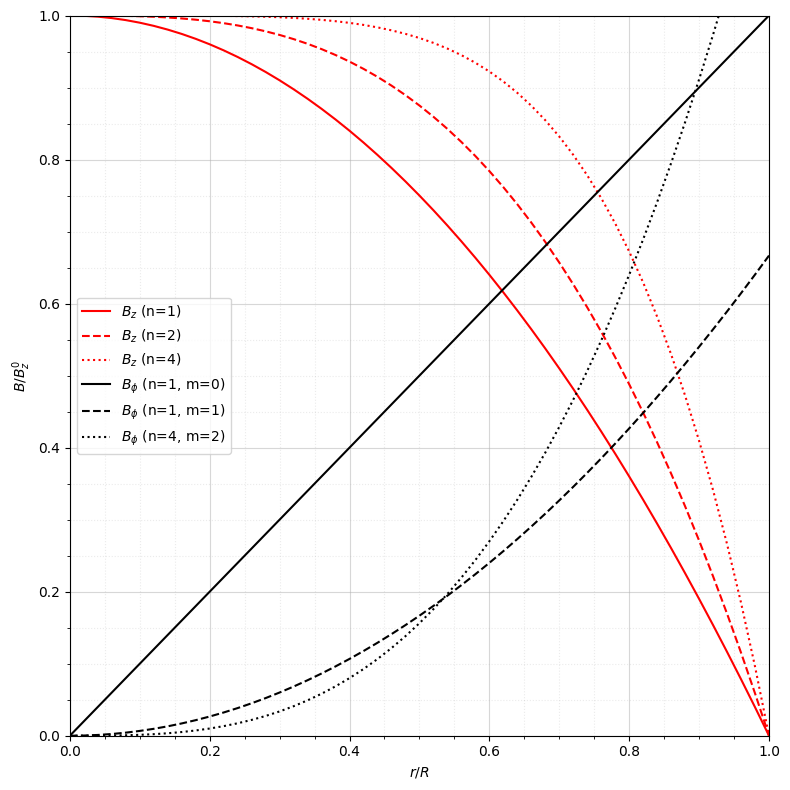

In [2]:
phi = 0
num_points = 31
R = 1.0
tau = 1.0
r_range: np.ndarray = np.linspace(0, R, num_points, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 8), tight_layout=True)

for n, line_style in zip([1, 2, 4], ["-", "--", ":"]):
    model = CCModel(B_z_0=1, R=R, tau=tau, n=n, m=0)
    r_range, B_field, *_ = model.radial_coordinate_sweep()
    ax.plot(r_range, B_field[:, 2], label=f"$B_z$ (n={model.n})", c="r", linestyle=line_style)

for n, m, line_style in zip([1, 1, 4], [0, 1, 2], ["-", "--", ":"]):
    model = CCModel(B_z_0=1, R=R, tau=tau, n=n, m=m)
    r_range, B_field, *_ = model.radial_coordinate_sweep()
    ax.plot(r_range, B_field[:, 1], label=f"$B_\\phi$ (n={model.n}, m={model.m})", c="k", linestyle=line_style)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("$r/R$")
ax.set_ylabel("$B/B_z^0$")
ax.legend()
ax.grid(which="major", alpha=0.5)
ax.grid(which="minor", alpha=0.25, linestyle=':')
ax.minorticks_on()
plt.savefig("CC_magnetic_field.png", dpi=400)
plt.show()


# Twist

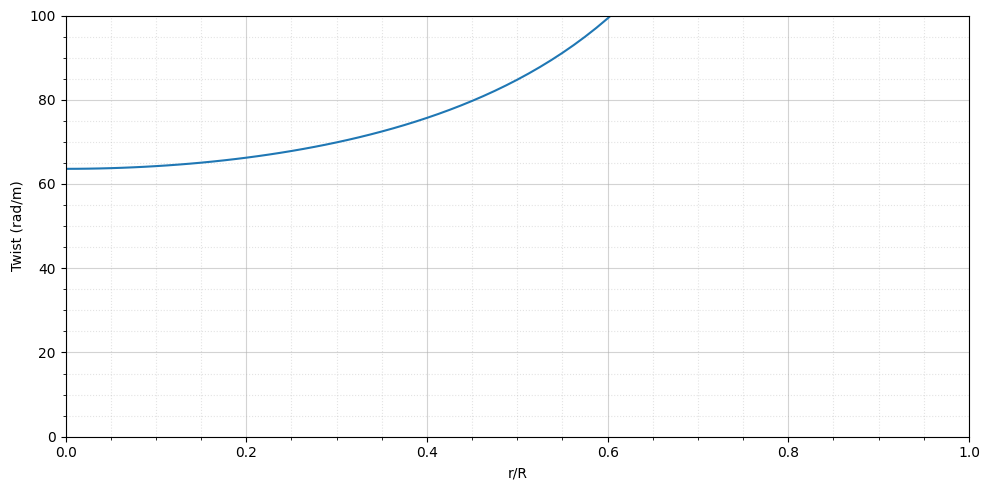

In [3]:
model = CCModel(n=1, m=0, R=0.05, tau=1.001)

N = 81
r_range = np.linspace(model.R / 1e5, model.R, N, endpoint=True)
twist = np.zeros((N))

for idx, r in enumerate(r_range):
    twist[idx] = model.get_twist(r, phi=0)

n_turns = twist / (2 * math.pi * model.R)

fig, ax = plt.subplots(figsize=(10, 5), tight_layout=True)
ax.plot(r_range / model.R, n_turns)
ax.set_xlabel("r/R")
ax.set_ylabel("Twist (rad/m)")
ax.grid(which="major", alpha=0.55)
ax.grid(which="minor", alpha=0.35, linestyle=':')
ax.minorticks_on()
ax.set_xlim(0, 1)
ax.set_ylim(0, 100)
plt.show()

# Validate table 2 of the article

In [11]:
table_2_df = pd.DataFrame.from_dict(
    [{
        "event": "2009 Sep 30 (273)",
        "tau": 1.0,
        "alpha": 3.72,
        "C1": -1.46,
        "phi": 302,
        "theta": 22,
        "y_0": 0.16,
        "R": 0.042,
    },
    {
        "event": "2009 Sep 30 (273)",
        "tau": 2.0,
        "alpha": 2.00,
        "C1": -0.64,
        "phi": 313,
        "theta": 21,
        "y_0": 0.26,
        "R": 0.038,   
    },
    {
        "event": "2010 Jan 01 (001)",
        "tau": 1.0,
        "alpha": 0.40,
        "C1": 0.82,
        "phi": 72,
        "theta": 22,
        "y_0": 0.08,
        "R": 0.105,   
    },
    {
        "event": "2010 Jan 01 (001)",
        "tau": 2.0,
        "alpha": 0.16,
        "C1": 0.36,
        "phi": 82,
        "theta": 25,
        "y_0": 0.04,
        "R": 0.109,   
    },
    {
        "event": "2012 Oct 12 (286)",
        "tau": 1.0,
        "alpha": 1.28,
        "C1": 1.17,
        "phi": 227,
        "theta": -63,
        "y_0": 0.23,
        "R": 0.081,  
    },
    {
        "event": "2012 Oct 12 (286)",
        "tau": 2.0,
        "alpha": 0.51,
        "C1": 0.49,
        "phi": 224,
        "theta": -66,
        "y_0": 0.29,
        "R": 0.081,  
    },
    {
        "event": "2012 Oct 31 (305)",
        "tau": 1.0,
        "alpha": 0.57,
        "C1": 1.02,
        "phi": 14,
        "theta": -74,
        "y_0": 0.02,
        "R": 0.114,  
    },
    {
        "event": "2012 Oct 31 (305)",
        "tau": 2.0,
        "alpha": 0.19,
        "C1": 0.30,
        "phi": 30,
        "theta": -75,
        "y_0": 0.09,
        "R": 0.116,  
    }
    ]
)
table_2_df

,event,tau,alpha,C1,phi,theta,y_0,R
0,2009 Sep 30 (273),1.0,3.72,-1.46,302,22,0.16,0.042
1,2009 Sep 30 (273),2.0,2.00,-0.64,313,21,0.26,0.038
2,2010 Jan 01 (001),1.0,0.40,0.82,72,22,0.08,0.105
3,2010 Jan 01 (001),2.0,0.16,0.36,82,25,0.04,0.109
4,2012 Oct 12 (286),1.0,1.28,1.17,227,-63,0.23,0.081
5,2012 Oct 12 (286),2.0,0.51,0.49,224,-66,0.29,0.081
6,2012 Oct 31 (305),1.0,0.57,1.02,14,-74,0.02,0.114
7,2012 Oct 31 (305),2.0,0.19,0.30,30,-75,0.09,0.116


In [17]:
mu_0 = 4*math.pi*1e-7
AU_to_m = 149_597_870_700.0
n = 1
m = 0

table_2_models = list()

for model_idx in range(len(table_2_df)):
    table_2_row = table_2_df.iloc[model_idx]

    tau = table_2_row["tau"]
    R = table_2_row["R"]
    B_z_0 = (table_2_row["alpha"] * 1e-22) * (mu_0 * tau * math.pow(R * AU_to_m, n + 1)) / (n + 1) # **2
    B_z_0 *= 1e9
    table_2_df.loc[model_idx, "B_z_0"] = B_z_0

    cc_model = CCModel(n=n, m=m, tau=tau, R=R, C_nm=table_2_row["C1"], B_z_0=B_z_0)

    table_2_df.loc[model_idx, "Psi_z"] = cc_model.get_total_axial_magnetic_flux(units="Mx") / 1e21
    table_2_df.loc[model_idx, "Psi_phi"] = cc_model.get_total_poloidal_magnetic_flux(units="Mx") / 1e8

    table_2_df.loc[model_idx, "H"] = "+" if table_2_row["C1"] > 0 else "-"
    table_2_df.loc[model_idx, "alpha_n"] = cc_model.alpha_n * 1e-9

    # Append the created model to a list.
    table_2_models.append(cc_model)

table_2_df["Psi_z_article"] = [0.18, 0.14, 0.75, 0.81, 0.84, 0.84, 1.46, 1.2]
table_2_df["Psi_z_error"] = abs(table_2_df["Psi_z_article"]) - table_2_df["Psi_z"]
table_2_df["Psi_z_factor"] = table_2_df["Psi_z_article"] / table_2_df["Psi_z"]
#table_2_df["Psi_z_factor_errorbar"] = 0.01 / table_2_df["Psi_z"]

table_2_df["Psi_phi_article"] = [20, 18, 61, 62, 62, 62, 88, 106]
table_2_df["Psi_phi_error"] = abs(table_2_df["Psi_phi"]) - table_2_df["Psi_phi_article"]
table_2_df["Psi_phi_factor"] = table_2_df["Psi_phi"] / table_2_df["Psi_phi_article"]
#table_2_df["Psi_phi_factor_errorbar"] = (table_2_df["Psi_phi"] / (table_2_df["Psi_phi_article"])**2) * 0.01
table_2_df

,event,tau,alpha,C1,phi,theta,y_0,R,B_z_0,Psi_z,Psi_phi,H,alpha_n,Psi_z_article,Psi_z_error,Psi_z_factor,Psi_phi_article,Psi_phi_error,Psi_phi_factor
0,2009 Sep 30 (273),1.0,3.72,-1.46,302,22,0.16,0.042,9.227248,0.057219,-39.709467,-,3.720000e-22,0.18,0.122781,3.145799,20,19.709467,-1.985473
1,2009 Sep 30 (273),2.0,2.00,-0.64,313,21,0.26,0.038,8.121904,0.061842,-36.070895,-,2.000000e-22,0.14,0.078158,2.263815,18,18.070895,-2.003939
2,2010 Jan 01 (001),1.0,0.40,0.82,72,22,0.08,0.105,6.201108,0.240336,118.787335,+,4.000000e-23,0.75,0.509664,3.120633,61,57.787335,1.947333
3,2010 Jan 01 (001),2.0,0.16,0.36,82,25,0.04,0.109,5.346058,0.334926,121.074610,+,1.600000e-23,0.81,0.475074,2.418446,62,59.074610,1.952816
4,2012 Oct 12 (286),1.0,1.28,1.17,227,-63,0.23,0.081,11.808934,0.272365,122.302482,+,1.280000e-22,0.84,0.567635,3.084096,62,60.302482,1.972621
5,2012 Oct 12 (286),2.0,0.51,0.49,224,-66,0.29,0.081,9.410244,0.325561,116.355055,+,5.100000e-23,0.84,0.514439,2.580159,62,54.355055,1.876694
6,2012 Oct 31 (305),1.0,0.57,1.02,14,-74,0.02,0.114,10.416342,0.475878,174.158767,+,5.700000e-23,1.46,0.984122,3.068013,88,86.158767,1.979077
7,2012 Oct 31 (305),2.0,0.19,0.30,30,-75,0.09,0.116,7.190023,0.510162,207.951673,+,1.900000e-23,1.20,0.689838,2.352193,106,101.951673,1.961808


In [18]:
model_idx = 0
B_z_0 = table_2_df.loc[model_idx, "B_z_0"]
tau = table_2_df.loc[model_idx, "tau"]
Bscal = 1e-9
delta = 1.0
RR = table_2_df.loc[model_idx, "R"]
AU = cc_model.AU_to_m
Faxial = 1e-12 * math.pi * B_z_0 * Bscal * (tau - 2.0 / (n + 3.0)) * (delta * RR * AU)**2
Faxial

np.float64(0.5721916225875157)

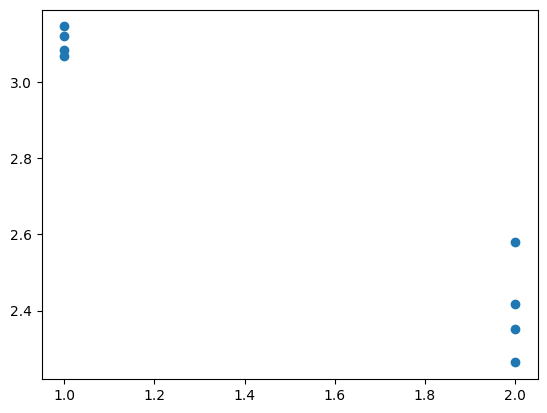

In [7]:
plt.scatter(table_2_df["tau"], table_2_df["Psi_z_factor"])
#plt.errorbar(table_2_df["tau"], table_2_df["Psi_z_factor"], yerr=table_2_df["Psi_z_factor_errorbar"], fmt="o")